In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
def GenerateRandomUniform(N: int):
    array = np.random.uniform(0, 1, N)
    array.sort()
    return array

def ModulateKsi(N):
    eta = GenerateRandomUniform(N)
    return -np.log(1-eta)

array = ModulateKsi(25)
print("Cгенерированная выборка = ", array)

Cгенерированная выборка =  [0.01652717 0.07168063 0.0860618  0.0992357  0.1878001  0.22139979
 0.25115899 0.37563571 0.42401559 0.44981042 0.47179052 0.63737127
 0.72305599 0.76226676 0.88722877 1.00456035 1.2735749  1.27607806
 1.45420752 2.08668699 2.22038724 2.38971069 2.69617409 2.70559083
 2.77128427]


In [18]:
from collections import Counter

def Mode(array):
    c = Counter(array) 
    return np.array([k for k, v in c.items() if v == c.most_common(1)[0][1]])

print("Мода =", Mode(array))

Мода = [0.01652717 0.07168063 0.0860618  0.0992357  0.1878001  0.22139979
 0.25115899 0.37563571 0.42401559 0.44981042 0.47179052 0.63737127
 0.72305599 0.76226676 0.88722877 1.00456035 1.2735749  1.27607806
 1.45420752 2.08668699 2.22038724 2.38971069 2.69617409 2.70559083
 2.77128427]


In [19]:
def Median(array):
    N = len(array)
    return np.median(array)

print("Медиана =", Median(array))

Медиана = 0.723055985887287


In [20]:
def Amplitude(array):
    return max(array) - min(array)

print("Размах =", Amplitude(array))

Размах = 2.7547571009756293


In [21]:
def Gamma(array):
    mean = np.mean(array)
    moment3 = stats.moment(array, 3, center=mean)
    dispersia = stats.moment(array, 2, center=mean)
    sigma = np.sqrt(dispersia)
    return moment3 / sigma ** 3

print("Коэффициент асимметрии =", Gamma(array))

Коэффициент асимметрии = 0.7647178647094633


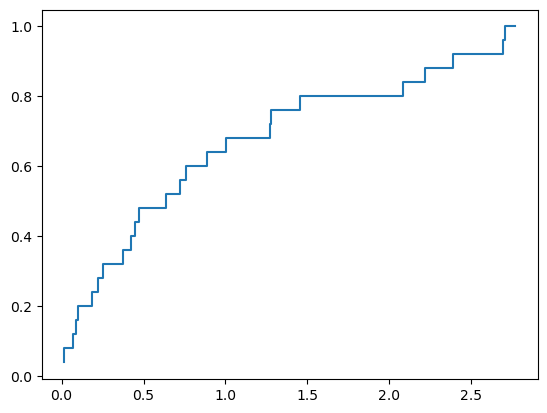

In [22]:
import statsmodels.api as sm

def EmpiricalDistributionFunction(array):
    ecdf = sm.distributions.ECDF(array)
    y = ecdf(array)
    plt.step(array, y)
    plt.show()
    
EmpiricalDistributionFunction(array)

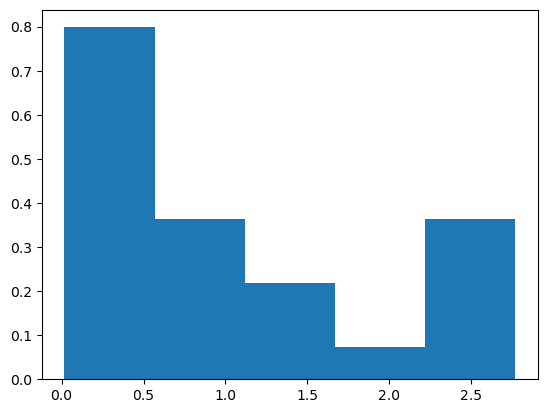

In [23]:
def Histogram(array, k=None):
    if k == None:
        k = 1 + np.floor(np.log2(len(array)))
    delta = ((max(array) - min(array)) / k)
    plt.hist(array, bins=int(k), weights=np.ones_like(array)/len(array)/delta)

Histogram(array)

Квартили = (0.2362793897275699, 1.770447256829228)
Эпсилон = 1.534167867101658


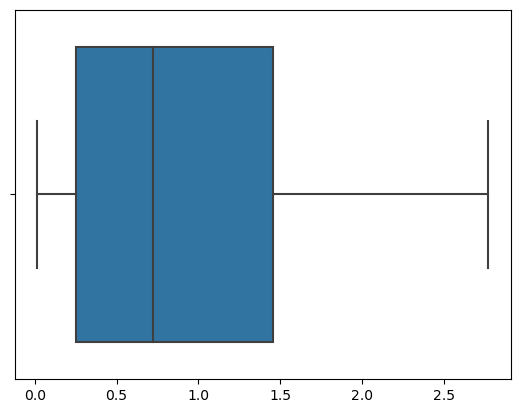

In [24]:
def Quartiles(array):
    N = len(array)
    if (N % 2 == 0):
        q1 = Median(array[0 : N//2])
        q2 = Median(array[N//2 : N])
    else:
        q1 = Median(array[0 : N//2])
        q2 = Median(array[N//2 + 1 : N])
        
    return q1, q2

def Epsilon(array):
    q1, q2 = Quartiles(array)
    return q2 - q1
    
def Boxplot(array):
    sns.boxplot(x=array, whis=Epsilon(array)*1.5) #длина усиков = 1.5EPSILON

print("Квартили =", Quartiles(array))
print("Эпсилон =", Epsilon(array))
    
Boxplot(array)

In [25]:
def NormalDistributionFunc(x, avg, sigma):
    exp = np.exp(-(x - avg)**2 / 2 / sigma ** 2)
    return 1 / np.sqrt(np.pi * 2) / sigma * exp 

def GenerateY(x, N):
    sigma = 1 / np.sqrt(N)
    avg = 1
    return NormalDistributionFunc(x, avg, sigma)

def DrawDistributionMeans(N):
    x = np.linspace(0, 2, 10000)
    plt.plot(x, GenerateY(x, N))

Сравнение распределения среднего арифметического с оценкой bootstrap


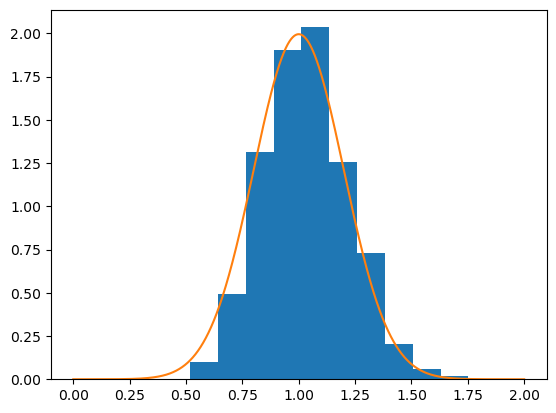

In [26]:
def BootstrapGenerate(data, n_bootstrap_samples=1000):
    return [np.random.choice(data, size=len(data), replace=True) for _ in range(n_bootstrap_samples)]

def BootstrapPlotMean(data):
    avgs_array = []
    for ar in BootstrapGenerate(data):
        avgs_array.append(np.mean(ar))
    Histogram(avgs_array)

print("Сравнение распределения среднего арифметического с оценкой bootstrap")
BootstrapPlotMean(array)
DrawDistributionMeans(25)

Коэффициент асимметрии bootstrap


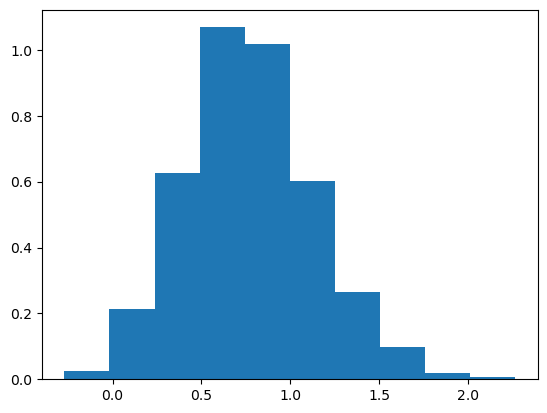

In [27]:
def BootstrapPlotGamma(data):
    gammas_array = []
    for ar in BootstrapGenerate(data):
             gammas_array.append(Gamma(ar))
    Histogram(gammas_array)

print("Коэффициент асимметрии bootstrap")
BootstrapPlotGamma(array)

In [28]:
def BootstrapPlotMedian(data):
    meds_array = []
    for ar in BootstrapGenerate(data):
         meds_array.append(Median(sorted(ar)))
    Histogram(meds_array)  

Сравнение распределения медианы с оценкой bootstrap


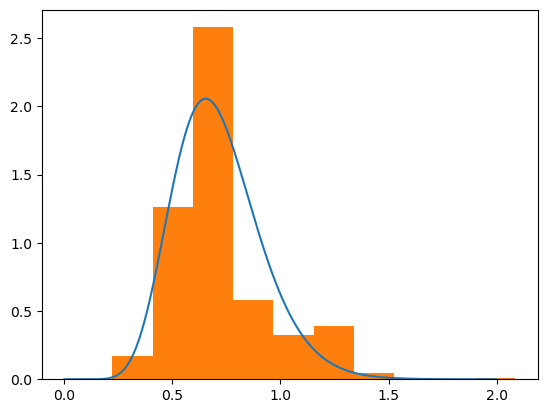

In [29]:
def MedeianDistributionPlot():
    x = np.linspace(0, 2, 10000)
    y = 25 * np.exp(-13*x) * 2704156 * (1 - np.exp(-x)) ** 12 
    plt.plot(x, y)

print("Сравнение распределения медианы с оценкой bootstrap")
MedeianDistributionPlot()
BootstrapPlotMedian(array)